# Affinity Scoring Analysis by MAYENE Bienvenue Schékina


# Objectif de l'étude :

Une agence marketing a envoyé un mailing à un représentatif de sa clientèle, soit 39 779 
clients afin de proposer un nouveau service. Le but de cette étude est d’analyser le profil 
des répondants à l’offre marketing et de trouver la formule de score permettant de 
« noter » l’ensemble des clients de l’enseigne et de cibler au mieux les individus ayant la 
plus forte probabilité de répondre positivement à l’offre commerciale.

# Plan d'analyse : 

1-) Inspection et preprocessing 

2-) Statistical Data Analysis

3-) Machine Learning : 
* Model fitting
* Model evaluation and eventualy model tuning

# Partie 1 : Dataset Inspection and visualization


In [2]:
# Chargement des librairies 

import pandas as pd
import scipy.stats as sp # pour l'analyse univariée
import statsmodels.api as sm
import matplotlib.pyplot as plt   # Pour la visualisation
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve


In [ ]:
#libraries for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [4]:
# Importation de la base de données 

mailing = pd.read_table("mailing_fin.txt")

# Apperçue du jeux de données
mailing.head()

,RETOUR,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,BUY6,BUY12,BUY18,VALUE24,COA6,fin
0,NON,45,52,F,1,748,0,A,0,0,0,209,0,0
1,NON,56,79,NaN,1,732,0,A,0,0,0,109,0,0
2,OUI,49,54,F,0,727,0,A,0,0,1,447,0,0
3,OUI,44,40,NaN,1,708,1,A,0,0,0,151,0,0
4,NON,59,41,F,0,646,1,A,0,0,0,233,0,0


## Dictionnaire des variables :

**BUY6 :** Nombre de commandes passé dans les 6 derniers mois

**BUY12 :** Nombre de commandes passées dans les 12 derniers mois

**BUY18 :** Nombre de commandes passées dans les 18 derniers mois

**COA6 :** Changement d’adresse OUI/NON

**FICO :** Revenu financiers

**INCOME :** Revenu

**LOC :** Localité A ;B ;C ;…;H

**MARRIED :** Marié/Pas marié OUI/NON

**OWNHOME :** Propriétaire ou non OUI/NON

**RETOUR :** A répondu au mail du 16 avril OUI/NON

**SEX :** Civilité du client M/F

**VALUE24 :** Montant des commandes sur 24 mois

### Visualization quantitatives variables

In [ ]:
# v

### Visualization qualitatives variables

In [30]:
target.unique()

array([0, 1], dtype=int64)

# Part 2 : Preprocessing

In [5]:
# renaming catagories of categoricals variables

rename_dict_retour = {'NON' : 0, 'OUI' : 1}
rename_dict_sex = {'M' : 0, 'F' : 1}
rename_dict_loc = {'E': 0,
'F': 1,
 'B': 2,
 'H': 3,
 'G': 4,
 'A': 5,
 'D': 6,
 'C': 7}

mailing["RETOUR"] = mailing["RETOUR"].replace(rename_dict_retour)
mailing["SEX"] = mailing["SEX"].replace(rename_dict_sex)
mailing["LOC"] = mailing["LOC"].replace(rename_dict_loc)

C:\Users\mayen\AppData\Local\Temp\ipykernel_31932\2880316358.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mailing["RETOUR"] = mailing["RETOUR"].replace(rename_dict_retour)
C:\Users\mayen\AppData\Local\Temp\ipykernel_31932\2880316358.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mailing["SEX"] = mailing["SEX"].replace(rename_dict_sex)
C:\Users\mayen\AppData\Local\Temp\ipykernel_31932\2880316358.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

In [32]:
# divide our daatset in a train and a test set
features = mailing.drop(columns = ["RETOUR", "fin"])
target = mailing["RETOUR"]

train_features, test_features,train_target ,test_target = train_test_split(features, target , test_size = 0.3, random_state = 42)

print('train_features :', train_features.shape, '\ntrain_target:', train_target.shape,
     '\ntest_features :', test_features.shape,
     "\ntest_target :", test_target.shape)

train_features : (27845, 12) 
train_target: (27845,) 
test_features : (11934, 12) 
test_target : (11934,)


In [8]:
# number of missing values

pd.isnull(train_features).sum()

AGE         0
INCOME      0
SEX        42
MARRIED     0
FICO        0
OWNHOME     0
LOC         0
BUY6        0
BUY12       0
BUY18       0
VALUE24     0
COA6        0
dtype: int64

In [16]:
train_features.columns.to_list()

['AGE',
 'INCOME',
 'SEX',
 'MARRIED',
 'FICO',
 'OWNHOME',
 'LOC',
 'BUY6',
 'BUY12',
 'BUY18',
 'VALUE24',
 'COA6']

In [9]:
# Divide variables from our datatset by their categories

cat_variables = ['SEX',
 'MARRIED',
 'OWNHOME',
 'LOC', 'COA6']
num_variables = ['AGE','INCOME', 'FICO', 'BUY6',
 'BUY12',
 'BUY18',
 'VALUE24']

### Categoricals variables

In [10]:
# replace de nan values
prep_na = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

cat_train = prep_na.fit_transform(train_features[cat_variables])
cat_test = prep_na.transform(test_features[cat_variables])

In [47]:
# do a onehot encoder

cat_train_2 = pd.DataFrame(cat_train, columns = cat_variables)
cat_test_2 = pd.DataFrame(cat_test, columns = cat_variables)

for var in cat_variables:
    cat_train_2[var] = cat_train_2[var].astype('int')
    cat_test_2[var] = cat_test_2[var].astype('int')


prep_onehot = OneHotEncoder(drop = 'first')

cat_train_3 = prep_onehot.fit_transform(cat_train_2)
cat_test_3 = prep_onehot.transform(cat_test_2)

In [48]:
# Retransforme our data into dataframe type

cat_train_3 = pd.DataFrame(cat_train_3.toarray(), columns = prep_onehot.get_feature_names_out())
cat_test_3 = pd.DataFrame(cat_test_3.toarray(), columns = prep_onehot.get_feature_names_out())

for var in prep_onehot.get_feature_names_out():
    cat_train_3[var] = cat_train_3[var].astype('int')
    cat_test_3[var] = cat_test_3[var].astype('int')


cat_train_3.head()

,SEX_1,MARRIED_1,OWNHOME_1,LOC_1,LOC_2,LOC_3,LOC_4,LOC_5,LOC_6,LOC_7,COA6_1
0,0,0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0


In [14]:
# change column type???

cat_train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SEX_0      27845 non-null  int32
 1   SEX_1      27845 non-null  int32
 2   MARRIED_0  27845 non-null  int32
 3   MARRIED_1  27845 non-null  int32
 4   OWNHOME_0  27845 non-null  int32
 5   OWNHOME_1  27845 non-null  int32
 6   LOC_0      27845 non-null  int32
 7   LOC_1      27845 non-null  int32
 8   LOC_2      27845 non-null  int32
 9   LOC_3      27845 non-null  int32
 10  LOC_4      27845 non-null  int32
 11  LOC_5      27845 non-null  int32
 12  LOC_6      27845 non-null  int32
 13  LOC_7      27845 non-null  int32
 14  COA6_0     27845 non-null  int32
 15  COA6_1     27845 non-null  int32
dtypes: int32(16)
memory usage: 1.7 MB


### Numericals variables

In [15]:
# normalisation des variables numériques

prep_norm = MinMaxScaler()

num_train = prep_norm.fit_transform(train_features[num_variables])
num_test = prep_norm.transform(test_features[num_variables])

In [40]:
num_train

array([[0.33333333, 0.44554455, 0.57959184, ..., 0.        , 0.25      ,
        0.22807018],
       [0.87719298, 0.36633663, 0.57959184, ..., 0.        , 0.        ,
        0.16207185],
       [0.70175439, 0.28712871, 0.48163265, ..., 0.        , 0.        ,
        0.04511278],
       ...,
       [0.49122807, 0.20792079, 0.53469388, ..., 0.33333333, 0.25      ,
        0.44193818],
       [0.35087719, 0.07920792, 0.26938776, ..., 0.        , 0.        ,
        0.13617377],
       [0.36842105, 0.27722772, 0.4122449 , ..., 0.        , 0.        ,
        0.09774436]])

In [16]:
# Have numerical dataset in a dataframe types

num_train_df = pd.DataFrame(num_train, columns = num_variables)
num_test_df = pd.DataFrame(num_test, columns = num_variables)

In [49]:
# Dataset Final reconstitution
data_train_final = pd.concat([num_train_df, cat_train_3], axis = 1)
data_test_final = pd.concat([num_test_df, cat_test_3], axis = 1)

data_train_final.head()

,AGE,INCOME,FICO,BUY6,BUY12,BUY18,VALUE24,SEX_1,MARRIED_1,OWNHOME_1,LOC_1,LOC_2,LOC_3,LOC_4,LOC_5,LOC_6,LOC_7,COA6_1
0,0.333333,0.445545,0.579592,0.0,0.0,0.25,0.228070,0,0,1,1,0,0,0,0,0,0,0
1,0.877193,0.366337,0.579592,0.0,0.0,0.00,0.162072,0,1,0,0,0,0,0,0,0,0,0
2,0.701754,0.287129,0.481633,0.0,0.0,0.00,0.045113,0,1,1,1,0,0,0,0,0,0,0
3,0.473684,0.435644,0.551020,0.0,0.0,0.00,0.020886,1,1,1,1,0,0,0,0,0,0,0
4,0.596491,0.138614,0.657143,0.0,0.0,0.00,0.083542,1,1,0,1,0,0,0,0,0,0,0


In [19]:
new_cat_variables = ['SEX_0','SEX_1','MARRIED_0', 'MARRIED_1',
'OWNHOME_0','OWNHOME_1','LOC_0','LOC_1','LOC_2','LOC_3',
 'LOC_4','LOC_5','LOC_6','LOC_7','COA6_0','COA6_1']

new_quant_variables = ['AGE',
 'INCOME',
 'FICO',
 'BUY6',
 'BUY12',
 'BUY18',
 'VALUE24']

# Part 3 : Modelisation

We will start our modélisation by creating a first model with all our features. we will evaluate it and ...

### Model 1

In [50]:
# Ajout d'une constante pour l'ordonnée à l'origine (intercept)
data_train_final_n = sm.add_constant(data_train_final)
data_train_final_n.index = train_features.index

In [51]:
# Ajuster un modèle de régression logistique

logit_model = sm.Logit(train_target, data_train_final_n)
result = logit_model.fit(maxiter=100)

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.379132
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 RETOUR   No. Observations:                27845
Model:                          Logit   Df Residuals:                    27826
Method:                           MLE   Df Model:                           18
Date:                Fri, 20 Sep 2024   Pseudo R-squ.:                 0.05394
Time:                        16:23:01   Log-Likelihood:                -10557.
converged:                       True   LL-Null:                       -11159.
Covariance Type:            nonrobust   LLR p-value:                1.665e-244
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7673      0.111     -6.926      0.000      -0.984      -0.550
AGE           -2.3918      0.

**Evaluation de nos modèles**

>- Test du ratio de vraisemblance : verifier la significativité globale du modèle

Les hypothèses du modèles sont les suivantes : 

H0 : Tous les coefficients associées au modèle sont nulle VS H1 : Il existe au moins un de ces coefficient qui n'est pas nulle

Si p-value < seuil (0.05) alors rejet de l'hypothèse nulle ce qui traduira la significativité globale du modèle.

>- significativité des variables qui sont dans notre modèle

In [52]:
data_train_final_n.head()

,const,AGE,INCOME,FICO,BUY6,BUY12,BUY18,VALUE24,SEX_1,MARRIED_1,OWNHOME_1,LOC_1,LOC_2,LOC_3,LOC_4,LOC_5,LOC_6,LOC_7,COA6_1
27111,1.0,0.333333,0.445545,0.579592,0.0,0.0,0.25,0.228070,0,0,1,1,0,0,0,0,0,0,0
21268,1.0,0.877193,0.366337,0.579592,0.0,0.0,0.00,0.162072,0,1,0,0,0,0,0,0,0,0,0
28073,1.0,0.701754,0.287129,0.481633,0.0,0.0,0.00,0.045113,0,1,1,1,0,0,0,0,0,0,0
29269,1.0,0.473684,0.435644,0.551020,0.0,0.0,0.00,0.020886,1,1,1,1,0,0,0,0,0,0,0
26334,1.0,0.596491,0.138614,0.657143,0.0,0.0,0.00,0.083542,1,1,0,1,0,0,0,0,0,0,0


In [55]:
# Model without any variables

logit_model_vide = sm.Logit(train_target, data_train_final_n['const'])
result_model_vide = logit_model_vide.fit()

print(result_model_vide.summary())

Optimization terminated successfully.
         Current function value: 0.400749
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 RETOUR   No. Observations:                27845
Model:                          Logit   Df Residuals:                    27844
Method:                           MLE   Df Model:                            0
Date:                Fri, 20 Sep 2024   Pseudo R-squ.:               6.902e-11
Time:                        16:36:17   Log-Likelihood:                -11159.
converged:                       True   LL-Null:                       -11159.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8346      0.017   -105.487      0.000      -1.869      -1.801


In [56]:
# Log-vraisemblance des deux modèles
lr_model1 = result.llf
lr_model_vide = result_model_vide.llf

# Calcul du test du ratio de vraisemblance
LR_stat = 2 * (lr_model1 - lr_model_vide)

# Degré de liberté (différence du nombre de paramètres entre les modèles)
df = len(result.params) - len(result_model_vide.params)

# Calcul de la p-valeur (à partir de la statistique du Chi2)
from scipy import stats
p_value = stats.chi2.sf(LR_stat, df)

print(f"Valeur LR complet: {lr_model1}")
print(f"Valeur LR Modèle vide: {lr_model_vide}")
print(f"Statistique du ratio de vraisemblance: {LR_stat}")
print(f"p-valeur du test: {p_value}")


Valeur LR complet: -10556.93482313828
Valeur LR Modèle vide: -11158.86561310511
Statistique du ratio de vraisemblance: 1203.8615799336621
p-valeur du test: 1.6650691747328552e-244


De ce resultat, nous voyons que la p-value resultant du test de significativité globale est inferieur au seuil. Par conséquent nous rejettons donc l'hypothèse nulle portant sur la nullité des coefficients du modèle. Notre Modèle est donc globalement significatif

### Model 2

In [69]:
logit_model2 = sm.Logit(train_target, data_train_final_n[['const','AGE','INCOME','FICO','BUY6','BUY12','BUY18','SEX_1',
 'MARRIED_1',
 'OWNHOME_1',
 'LOC_2',
 'LOC_6',
 'LOC_7']
 ])
result2 = logit_model2.fit(maxiter=100)

print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.379291
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 RETOUR   No. Observations:                27845
Model:                          Logit   Df Residuals:                    27832
Method:                           MLE   Df Model:                           12
Date:                Fri, 20 Sep 2024   Pseudo R-squ.:                 0.05355
Time:                        17:39:34   Log-Likelihood:                -10561.
converged:                       True   LL-Null:                       -11159.
Covariance Type:            nonrobust   LLR p-value:                2.023e-248
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7249      0.103     -7.021      0.000      -0.927      -0.523
AGE           -2.4130      0.

In [70]:
# Comparaison Model1 et Model 2

lr_model1 = result.llf
lr_model2 = result2.llf

# Calcul du test du ratio de vraisemblance
LR_stat = 2 * (lr_model1 - lr_model2)

# Degré de liberté (différence du nombre de paramètres entre les modèles)
df = len(result.params) - len(result2.params)

p_value = stats.chi2.sf(LR_stat, df)

print(f"Valeur LR complet: {lr_model1}")
print(f"Valeur LR Modèle vide: {lr_model2}")
print(f"Statistique du ratio de vraisemblance: {LR_stat}")
print(f"p-valeur du test: {p_value}")

Valeur LR complet: -10556.93482313828
Valeur LR Modèle vide: -10561.344077748687
Statistique du ratio de vraisemblance: 8.81850922081503
p-valeur du test: 0.18404519778207878


P-value> seuil , Non rejet de l'hypothèse nulle, et donc le meilleur model est le model 2

In [71]:
data_test_final_n = sm.add_constant(data_test_final)
data_test_final_n.index = test_features.index

y_pred_prob = result2.predict(data_test_final_n[['const','AGE','INCOME','FICO','BUY6','BUY12','BUY18','SEX_1',
 'MARRIED_1',
 'OWNHOME_1',
 'LOC_2',
 'LOC_6',
 'LOC_7']
 ])

# Convertir les probabilités en classes (0 ou 1) avec un seuil de 0.5
y_pred_class = (y_pred_prob >= 0.5).astype(int)

AUC: 0.65


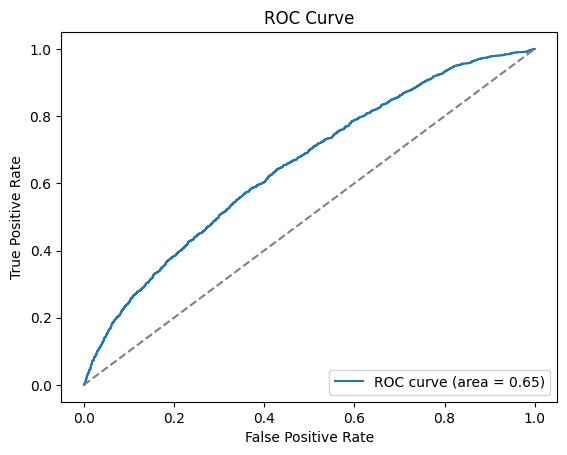

In [72]:
auc = roc_auc_score(test_target, y_pred_prob)
print(f'AUC: {auc:.2f}')

# Courbe ROC
fpr, tpr, thresholds = roc_curve(test_target, y_pred_prob)

# Tracé de la courbe ROC
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Optimisation du modèle

## Score computing

In [65]:
coefficients = result.params

score_lineaire = np.dot(data_train_final_n, coefficients)

# Affichage des premiers scores linéaires
print(score_lineaire[:10])

[-2.00267203 -2.89655428 -2.94745983 -2.31425793 -2.3521502  -1.59370193
 -1.66598241 -1.69836338 -1.81393502 -1.42801099]


In [66]:
coefficients

const       -0.767312
AGE         -2.391817
INCOME       0.399756
FICO        -1.289030
BUY6        -0.480811
BUY12       -0.846354
BUY18        2.429176
VALUE24      0.257229
SEX_1        0.124005
MARRIED_1    0.527819
OWNHOME_1   -0.495257
LOC_1       -0.039789
LOC_2        0.112070
LOC_3       -0.021181
LOC_4       -0.031963
LOC_5        0.128994
LOC_6        0.486778
LOC_7        0.625253
COA6_1       0.150686
dtype: float64